In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
clm = df.columns
for i in clm:
    if df[i].dtype == 'float':
        print(i)

total_bill
tip


In [5]:
df['tip'].dtype == 'float'

True

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
# Covert time into numerical features
df.time = encoder.fit_transform(df.time)

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,0,3
240,27.18,2.00,Female,Yes,Sat,0,2
241,22.67,2.00,Male,Yes,Sat,0,2
242,17.82,1.75,Male,No,Sat,0,2


<AxesSubplot: >

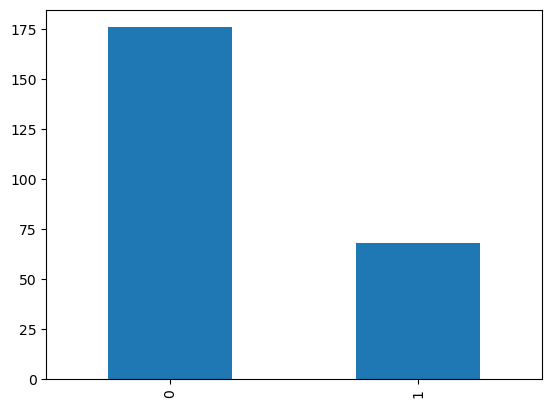

In [10]:
df.time.value_counts().plot(kind= 'bar')

In [11]:
# seperating cat and num featurs
X = df.drop(['time'], axis= 1)

In [12]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [13]:
# Y 
y = df.time

# train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [15]:
X_train.shape, y_train.shape

((195, 6), (195,))

In [16]:
# impoerting some libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [18]:
clm

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [19]:
# categorical column
cat = []
for i in clm:
    if df[i].dtype == 'category':
        cat.append(i)

In [20]:
cat

['sex', 'smoker', 'day']

In [21]:
df[cat]

,sex,smoker,day
0,Female,No,Sun
1,Male,No,Sun
2,Male,No,Sun
3,Male,No,Sun
4,Female,No,Sun
...,...,...,...
239,Male,No,Sat
240,Female,Yes,Sat
241,Male,Yes,Sat
242,Male,No,Sat


In [22]:
# num column
num = []
for i in clm:
    if df[i].dtype != 'category':
        num.append(i)

In [23]:
num.pop(2)

'time'

In [24]:
num

['total_bill', 'tip', 'size']

In [25]:
df[num]

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    int64   
 6   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(2)
memory usage: 8.9 KB


In [27]:
# Creating pipeline

num_pipe= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy= 'median')),
        ('scalare', StandardScaler())
    ]
)

cat_pipe= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy= 'most_frequent')),
        ('Onehot', OneHotEncoder())
    ]
)

In [28]:
preprosessing = ColumnTransformer([
    ('num_pipe', num_pipe, num),
    ('cat_pipe', cat_pipe, cat)

])

In [29]:
preprosessing

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalare',
                                                  StandardScaler())]),
                                 ['total_bill', 'tip', 'size']),
                                ('cat_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Onehot', OneHotEncoder())]),
                                 ['sex', 'smoker', 'day'])])

In [30]:
X_train = preprosessing.fit_transform(X_train)

In [31]:
X_train

array([[-0.79306155, -0.2580329 , -0.61214068, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.46322744, -0.74211442, -0.61214068, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80730659,  0.6399734 , -0.61214068, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.65383098, -1.46472887, -0.61214068, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.64749986,  0.32426806, -0.61214068, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.75289699, -0.41237773,  0.45363997, ...,  1.        ,
         0.        ,  0.        ]])

In [32]:
X_test = preprosessing.transform(X_test)

In [33]:
X_test

array([[-0.04546101,  0.06468811, -0.61214068,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-1.30860871, -0.76316144, -0.61214068,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.4952348 , -0.76316144,  1.51942062,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.64841289,  1.45379161,  1.51942062,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.82506891, -0.76316144, -0.61214068,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.26608319, -0.76316144, -0.61214068,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.   

In [34]:
# Creating the model
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [35]:
models = {
    'Random forest' : RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'SVC' : SVC()
}

In [36]:
models

{'Random forest': RandomForestClassifier(),
 'DT': DecisionTreeClassifier(),
 'SVC': SVC()}

In [37]:
# X_train, X_test, y_train, y_test
def eval_model(X_train, X_test, y_train, y_test, models):
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        acc = round(acc*100,2)
        report[list(models.keys())[i]] = acc
    return report

In [38]:
eval_model(X_train, X_test, y_train, y_test, models)

{'Random forest': 95.92, 'DT': 93.88, 'SVC': 95.92}

In [39]:
# Hyperparameters

In [40]:
classifier = RandomForestClassifier()

In [41]:
paramsm = {
    'max_depth' : [3,5,8,12],
    'n_estimators' : [100,300,600],
    'criterion' : ['gini', 'entropy'],
    'max_features':['sqrt', 'log2']
}

In [42]:
paramsm

{'max_depth': [3, 5, 8, 12],
 'n_estimators': [100, 300, 600],
 'criterion': ['gini', 'entropy'],
 'max_features': ['sqrt', 'log2']}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
hp_model = GridSearchCV(classifier, param_grid= paramsm,scoring='accuracy', cv=5, verbose= 3,n_jobs= -1)

In [45]:
hp_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300, 600]},
             scoring='accuracy', verbose=3)

In [46]:
#hp_model.fit(X_train, y_train)

In [47]:
best_parameters = {
    'max_depth' : [3],
    'n_estimators' : [100],
    'criterion' : ['gini'],
    'max_features':['sqrt']
}


In [49]:
classfy = RandomForestClassifier(max_depth =3,n_estimators =100,criterion ='gini',max_features= 'sqrt')

In [50]:
classfy.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
y_pred = classfy.predict(X